In [3]:
!pip install tweepy
import numpy as np
import pandas as pd
import tweepy
import gensim
import gensim.corpora as corpora
import re
import nltk

In [4]:
print(np.__version__)
print(pd.__version__)
print(gensim.__version__)
print(re.__version__)
print(nltk.__version__)
# import gensim
# import re
# import nltk

1.19.2
1.1.3
4.0.1
2.2.1
3.5


# Data pre-processing and annotation

In [5]:
# data pre-processing

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come', 'https', 'co','ever','well','cyberattack','cyberattacks','cybersecurity','security','attack','attacks','cyber'])
def text_clean(sentences):
    porter= nltk.PorterStemmer()
    
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails and '@someone'
        sent = re.sub('https?:\/\/.*\/\w*', '', sent)
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        
        #tokenize
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        
        #remove stopwords
        sent = [word for word in sent if word not in stop_words]
        #stemming
        sent = [porter.stem(word) for word in sent]
        if len(sent)<=4:
            yield ([])
            continue
        yield(sent)

In [7]:
# cyberattack types classifier
from sklearn.model_selection import train_test_split
df_new = pd.read_csv('datanew.csv')

data_words_1 = list(text_clean(df_new.text.values.tolist()))

sentences = []
for i in data_words_1:
    sentences.append(" ".join(i))
#print(sentences)

df_clean = pd.DataFrame({
    'text':sentences,
    'words': data_words_1
})


df_clean['label']= 0 # In fact, this is an manual annotation process. 'label' = phishing/botnet/ddos/zeroday/malware/ransomware/general
print(df_clean)
#——————


                                                   text  \
0     let demystifi common type firmwar use wild tod...   
1     let demystifi common type firmwar use wild tod...   
2     rise here quick look common type cybercrim cyb...   
3     rise here quick look common type cybercrim cyb...   
4     cybercrim rate nearli result covid pandem stay...   
...                                                 ...   
8839   feder contractor must report face fals claim act   
8840                                                      
8841  ransomwar one fastest grow threat expert estim...   
8842  includ degre busi threatactor cybercrimin lead...   
8843  includ degre busi threatactor cybercrimin lead...   

                                                  words  label  
0     [let, demystifi, common, type, firmwar, use, w...      0  
1     [let, demystifi, common, type, firmwar, use, w...      0  
2     [rise, here, quick, look, common, type, cyberc...      0  
3     [rise, here, quick, look,

In [736]:
#frequency
import collections

#data_words.flatten()
flatten= [j for i in data_words1 for j in i]
word_counts = collections.Counter(flatten)
#word_counts
word_counts_top = dict(word_counts.most_common(50))
word_counts_top

{'ransomware': 857,
 'malware': 748,
 'technology': 636,
 'infosec': 618,
 'cybercrime': 584,
 'data': 554,
 'us': 489,
 'amp': 487,
 'hacker': 464,
 'zeroday': 443,
 'databreach': 424,
 'protect': 409,
 'tech': 404,
 'new': 375,
 'ciso': 354,
 'hackers': 351,
 'business': 347,
 'systems': 341,
 'russia': 331,
 'cyberthreats': 325,
 'infrastructure': 304,
 'dataprivacy': 300,
 'zerotrust': 298,
 'datatheft': 284,
 'microsoft': 266,
 'apt': 250,
 'ddos': 249,
 'solarwinds': 247,
 'botnet': 243,
 'hacking': 242,
 'russian': 228,
 'services': 227,
 'organizations': 222,
 'supply': 221,
 'devices': 214,
 'advanced': 208,
 'view': 208,
 'chain': 205,
 'explore': 201,
 'phishing': 200,
 'leverage': 200,
 'vapt': 196,
 'stpiindia': 196,
 'learn': 195,
 'stpi': 195,
 'rt': 192,
 'targets': 192,
 'applications': 192,
 'targeting': 191,
 'breach': 189}

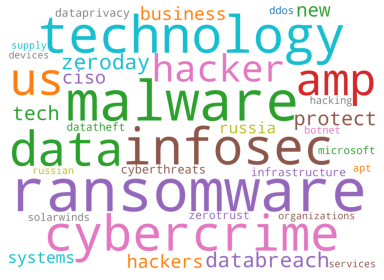

In [739]:
# visualisation, we know which categories should we classify
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

# my_cloud = WordCloud(stopwords=stop_words,
#                   background_color='white',
#                   width=2500,
#                   height=1800,
#                   max_words=10,
#                   colormap='tab10',
#                   prefer_horizontal=1.0).generate_from_frequencies(word_counts_top)
my_cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=35,
                  colormap='tab10',
                  prefer_horizontal=1.0).generate_from_frequencies(word_counts_top)
#topics = lda_model.show_topics(formatted=False)

#plt.subplots_adjust(wspace=0, hspace=0)
plt.gca().imshow(my_cloud)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [ ]:
#topic model 
import gensim.corpora as corpora
import gensim
from pprint import pprint

def print_dict(dict):
    for key in dict:
        print(type(key), key, str(dict[key]))
    
    
dictionary = corpora.Dictionary(data_words)
print(str(dictionary)) 

# print(dictionary.dfs) # dictionary, {word id, in how many documents}

# print(dictionary.num_docs) #The nunmber of document 

#print("dictionary.items()")

#print_dict(dict(dictionary.items()))

#print(dictionary.token2id)


#print_dict(dictionary.id2token) #Dictionary, {word id, corresponding word}

#print_dict(dictionary.token2id)

# print dictionary.num_pos #The number of all words

#print(dictionary.num_nnz) #The sum of the number of words not repeated in each file

corpus =  [dictionary.doc2bow(text) for text in data_words]

print(corpus[0])
print(data_words[0])
print(corpus[2])
print(data_words[2])


lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=5 
                                          )

pprint(lda_model.print_topics())

In [ ]:
print('\nPerplexity:', lda_model.log_perplexity(corpus))

In [ ]:
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

## Data semi-automatic annotation: At the bottom of this notebook ‘Pseudo-labelling’.

# Data preparation

In [ ]:
#After annotation, we run this cell to make a map:  E.g. 'phishing' to 1.
#df_labeled will be half-labelled , a half with manual label and a half with pseudo-labelling.(labels of last 4167 tweets = None)
df_labeled = df_clean.copy(deep=True)
label_mapping = {'phishing': 1, 'botnet': 2, 'ddos': 3, 'zeroday': 4, 'malware': 5, 'ransomware': 6, 'general': 0}
df_labeled['label'] = df_labeled['label'].map(label_mapping)
print(df_labeled)

In [9]:
# or Read the processed data directly:
df_labeled = pd.read_csv('pseudo.csv',index_col=0)

# data_words_1 = list(text_clean(df_labeled.text.values.tolist()))
# sentences = []
# for i in data_words_1:
#     sentences.append(" ".join(i))

df_labeled

,text,words,label
0,let demystifi common type firmwar use wild tod...,"['let', 'demystifi', 'common', 'type', 'firmwa...",5
1,let demystifi common type firmwar use wild tod...,"['let', 'demystifi', 'common', 'type', 'firmwa...",5
2,rise here quick look common type cybercrim cyb...,"['rise', 'here', 'quick', 'look', 'common', 't...",1
3,rise here quick look common type cybercrim cyb...,"['rise', 'here', 'quick', 'look', 'common', 't...",1
4,cybercrim rate nearli result covid pandem stay...,"['cybercrim', 'rate', 'nearli', 'result', 'cov...",0
...,...,...,...
4801,fbi email infrastructur compromis use send fak...,"['fbi', 'email', 'infrastructur', 'compromis',...",0
4566,fbi email infrastructur compromis use send fak...,"['fbi', 'email', 'infrastructur', 'compromis',...",0
6751,water infrastructur water usa infrastructur,"['water', 'infrastructur', 'water', 'usa', 'in...",0
6681,network segment vpn tunnel introduc solut teli...,"['network', 'segment', 'vpn', 'tunnel', 'intro...",0


In [13]:
X_train, X_test, y_train, y_test = train_test_split(df_labeled.text, df_labeled['label'].tolist(),test_size=0.3)
print(len(X_train),len(X_test),len(y_train),len(y_test))

5832 2500 5832 2500


In [115]:
# compare two vectorizers' performance (omit. Tfidfvec is better)
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv_fit = cv.fit(X_train)
X_train_ = cv_fit.transform(X_train)
X_test_ = cv_fit.transform(X_test)
tosee = pd.DataFrame(X_train_.toarray(),columns=cv_fit.get_feature_names())
tosee

,aa,aan,aback,aban,abc,abhangigkeit,abil,abl,abroad,absolut,...,𝐓𝐮𝐞𝐬,𝐠𝐨,𝐡𝐨𝐮𝐫,𝐦𝐢𝐧𝐮𝐭𝐞𝐬,𝐭𝐨,𝐭𝐨𝐝𝐚𝐲,𝐰𝐞𝐛𝐢𝐧𝐚𝐫,𝒟𝒾𝑒𝒷𝒪,𝗖𝘆𝗯𝗲𝗿𝘀𝗲𝗰𝘂𝗿𝗶𝘁𝘆,𝘂𝗽𝗱𝗮𝘁𝗲𝘀
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5827,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5828,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5829,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer()
tv_fit = tv.fit(X_train)
X_train_ = tv_fit.transform(X_train)
X_test_ = tv_fit.transform(X_test)
tosee = pd.DataFrame(X_train_.toarray(),columns=tv_fit.get_feature_names())
tosee

,aa,aan,aback,aban,abc,abhangigkeit,abil,abl,abroad,absolut,...,𝐓𝐮𝐞𝐬,𝐠𝐨,𝐡𝐨𝐮𝐫,𝐦𝐢𝐧𝐮𝐭𝐞𝐬,𝐭𝐨,𝐭𝐨𝐝𝐚𝐲,𝐰𝐞𝐛𝐢𝐧𝐚𝐫,𝒟𝒾𝑒𝒷𝒪,𝗖𝘆𝗯𝗲𝗿𝘀𝗲𝗰𝘂𝗿𝗶𝘁𝘆,𝘂𝗽𝗱𝗮𝘁𝗲𝘀
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5829,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
# Feature selection: 
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer()
tv_fit = tv.fit(X_train)
X_train_ = tv_fit.transform(X_train)
X_test_ = tv_fit.transform(X_test)

# tv_fit = tv.fit(X_train)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

clf = SVC(C=0.9, kernel='linear', gamma=1)
#LR = ( C=3.76, max_iter=1000, solver='liblinear')  #classifier
wrapper_model = RFE(estimator=clf, n_features_to_select=200).fit(X_train_,y_train)
X_wrapper_train = wrapper_model.transform(X_train_)
X_wrapper_test =  wrapper_model.transform(X_test_)
#X_wrapper = RFE(estimator=LR, n_features_to_select=200).fit_transform(X_whole, dfx['label'].tolist())
X_wrapper_train

# X_train_ = tv_fit.transform(X_train)
# X_test_ = tv_fit.transform(X_test)
# tosee = pd.DataFrame(X_train_.toarray(),columns=tv_fit.get_feature_names())
# tosee

<1316x200 sparse matrix of type '<class 'numpy.float64'>'
	with 9827 stored elements in Compressed Sparse Row format>

In [66]:
#without feature selection
from sklearn.svm import SVC

clf = SVC(C=0.5, kernel='rbf', gamma=1)
clf.fit(X_train_, y_train) 
print(clf.predict(X_test_))
clf.score(X_test_,y_test)

[6 6 1 6 6 6 6 6 6 2 5 2 6 6 6 6 1 1 4 2 6 1 4 6 1 6 1 5 1 6 2 6 6 6 5 6 1
 6 1 1 6 6 6 1 3 2 4 2 6 3 4 5 3 6 6 6 4 2 6 2 6 3 2 1 6 5 6 2 5 5 5 6 1 6
 6 2 6 2 6 3 5 6 2 1 6 4 2 6 6 6 2 6 1 2 5 6 6 1 1 6 6 6 3 6 6 1 4 4 2 6 1
 5 1 2 4 4 6 6 6 6 6 6 6 6 5 1 1 2 6 1 6 6 4 2 6 6 4 6 2 5 6 6 1 6 6 6 5 3
 6 2 5 5 6 6 6 6 5 4 1 6 6 1 4 1 1 2 1 4 6 1 6 4 6 6 6 6 1 5 6 6 1 4 6 2 2
 6 6 6 6 6 6 6 1 6 2 5 4 6 6 6 6 1 3 3 1 6 6 6 1 6 6 5 5 6 1 5 2 1 6 1 2 6
 6 6 6 5 6 4 5 6 4 1 5 2 3 6 6 6 5 2 6 5 4 2 4 2 1 4 6 2 6 6 5 6 1 4 6 6 1
 6 6 6 6 6 6 3 1 1 6 1 6 5 3 4 1 2 5 6 4 6 6 1 6 5 6 1 6 6 6 6 5 4 6 4 6 6
 6 4 2 6 6 6 1 6 1 2 6 6 2 2 6 6 4 4 6 6 5 6 6 4 6 5 3 2 1 2 6 6 6 4 1 1 6
 2 5 4 5 6 6 4 6 6 6 5 2 6 1 6 6 6 2 6 1 2 6 2 5 1 5 1 6 5 6 1 1 5 1 5 1 6
 4 2 6 6 2 5 2 6 1 6 6 1 6 3 5 2 1 6 6 6 6 6 6 6 6 5 1 6 2 6 3 2 5 6 5 5 2
 3 1 6 5 1 1 5 5 6 6 1 1 6 2 6 1 6 6 6 1 6 6 5 6 5 6 2 6 6 6 2 2 6 6 3 5 1
 1 4 1 5 4 2 5 5 6 2 5 6 4 6 6 6 5 6 5 1 6 6 6 1 5 4 6 5 5 1 5 1 6 4 1 1 6
 6 5 6 6 1 2 6 2 2 6 6 6 

0.9237588652482269

In [67]:
#with feature selection
from sklearn.svm import SVC

clf = SVC(C=0.5, kernel='rbf', gamma=1)
clf.fit(X_wrapper_train, y_train) 
print(clf.predict(X_wrapper_test))
clf.score(X_wrapper_test,y_test)

[6 6 1 6 6 6 6 6 6 2 5 2 6 6 6 6 1 1 4 2 6 1 4 6 2 6 1 5 1 5 2 6 6 6 5 6 1
 6 1 1 6 6 6 1 3 2 4 2 6 3 4 5 3 6 6 6 4 2 6 2 6 3 2 1 6 5 6 2 5 5 5 6 1 6
 6 2 6 2 6 3 6 6 2 1 5 4 2 5 6 6 1 6 1 2 5 6 6 1 1 6 6 6 3 6 6 1 4 4 2 6 1
 5 1 2 4 4 6 6 6 6 6 6 6 1 5 1 1 2 6 1 6 5 4 2 6 6 4 6 2 5 6 6 1 6 6 6 5 3
 6 2 5 5 6 6 1 6 5 4 1 6 6 1 4 1 1 2 1 4 6 1 6 4 6 6 6 6 1 5 6 6 1 4 6 2 2
 6 6 6 6 6 6 6 1 5 2 5 4 6 6 6 6 1 3 3 1 6 6 6 1 6 6 5 5 6 1 5 2 1 6 1 1 6
 6 6 5 5 6 4 5 6 4 1 5 2 3 6 6 6 5 2 6 5 4 2 4 2 1 4 6 2 6 6 5 6 1 4 1 6 1
 6 5 6 6 6 6 3 1 1 6 1 1 5 3 4 1 2 5 6 4 6 6 1 6 5 6 1 6 6 6 6 5 4 6 4 6 6
 6 4 2 6 6 6 1 6 1 2 6 6 2 2 6 6 4 4 6 6 5 6 6 4 6 5 3 2 1 2 6 6 6 4 1 1 6
 2 5 4 5 6 6 4 6 6 6 5 2 6 1 6 6 6 2 6 1 2 6 2 5 1 5 1 6 5 5 1 1 5 1 5 1 6
 4 2 6 6 2 5 2 6 1 6 6 1 6 3 5 2 1 6 6 6 6 6 6 6 6 5 1 6 2 6 3 2 5 6 5 5 2
 3 1 6 5 1 1 5 5 6 6 1 1 6 2 6 1 6 6 5 1 6 6 5 6 5 6 2 6 5 6 2 2 6 6 3 5 1
 1 4 1 5 4 2 5 5 6 2 5 6 4 6 6 6 5 1 5 1 6 6 6 1 5 4 6 5 5 1 5 1 6 4 1 1 1
 6 5 6 5 1 2 6 2 2 6 6 6 

0.9539007092198581

# Result of different machine learning algorithms

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def generate_conf_mat(y_test,y_pred):
    conf_mat = confusion_matrix(y_test, y_pred) #row: y_true,0,1,2...  column:y_pred,0,1,2...
    #print(conf_mat)
    
    #Normalization 
    conf_mat_norm = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]     # normalization 
    conf_mat_norm = np.around(conf_mat_norm, decimals=2)

    # === plot ===
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_mat_norm, annot=True, cmap='Blues') # annot=True to annotate cells

    #The scope of plotting the Y-axis
    plt.ylim(0, 7)
    plt.title('Confusion Matrix'); 
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

accuracy: 0.9076
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2071
           1       1.00      0.25      0.40        85
           2       0.80      1.00      0.89        67
           3       1.00      0.12      0.22        16
           4       0.94      0.92      0.93        50
           5       1.00      0.22      0.36        59
           6       0.96      0.34      0.50       152

    accuracy                           0.91      2500
   macro avg       0.94      0.55      0.61      2500
weighted avg       0.92      0.91      0.88      2500



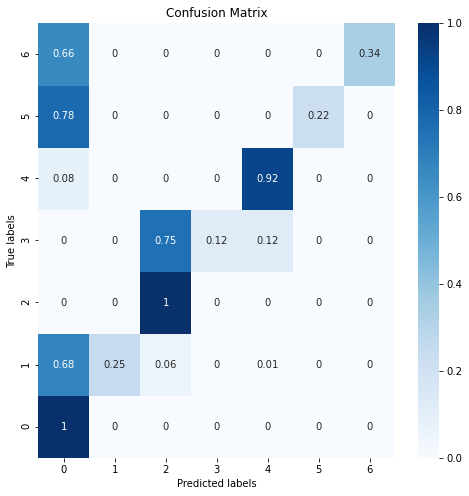

In [123]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB().fit(X_train_,y_train)
mnb_score = mnb.score(X_test_,y_test)
y_pred = mnb.predict(X_test_)
prob = mnb.predict_proba(X_test_)
#+tfidf score 0.89
print('accuracy:' ,mnb_score)

t = metrics.classification_report(y_test, mnb.predict(X_test_), target_names=['0','1','2','3','4','5','6'])

print(t)
generate_conf_mat(y_test,y_pred)

accuracy: 0.876
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      2071
           1       0.64      0.82      0.72        85
           2       0.61      1.00      0.76        67
           3       0.06      0.12      0.08        16
           4       0.61      0.98      0.75        50
           5       0.60      0.78      0.68        59
           6       0.57      0.79      0.66       152

    accuracy                           0.88      2500
   macro avg       0.58      0.77      0.65      2500
weighted avg       0.91      0.88      0.89      2500



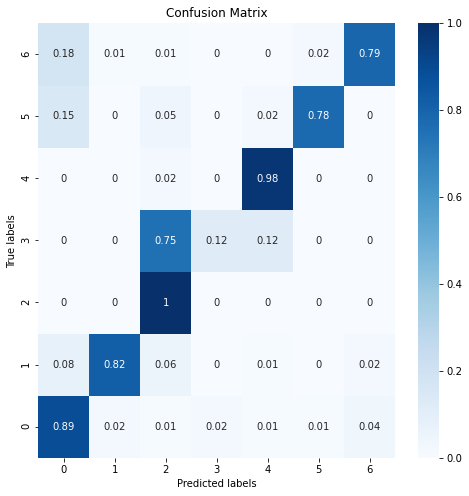

In [125]:
from sklearn.naive_bayes import ComplementNB
cnb = ComplementNB().fit(X_train_,y_train)
cnb_score = cnb.score(X_test_,y_test)
y_pred = cnb.predict(X_test_)
prob = cnb.predict_proba(X_test_)
#+tfidf score 0.89
print('accuracy:' ,cnb_score)

t = metrics.classification_report(y_test, cnb.predict(X_test_), target_names=['0','1','2','3','4','5','6'])

print(t)
generate_conf_mat(y_test,y_pred)

accuracy: 0.93
              precision    recall  f1-score   support

           0       0.95      0.99      0.96      2071
           1       0.88      0.60      0.71        85
           2       0.81      1.00      0.89        67
           3       0.00      0.00      0.00        16
           4       0.94      0.88      0.91        50
           5       0.91      0.49      0.64        59
           6       0.77      0.62      0.69       152

    accuracy                           0.93      2500
   macro avg       0.75      0.65      0.69      2500
weighted avg       0.92      0.93      0.92      2500



E:\kaifa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


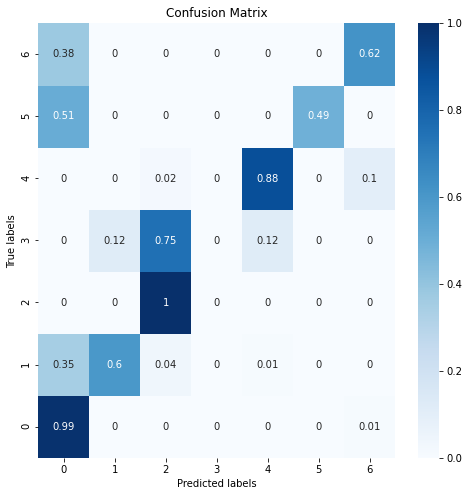

In [127]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB().fit(X_train_,y_train)
bnb_score = bnb.score(X_test_,y_test)
y_pred = bnb.predict(X_test_)
prob = bnb.predict_proba(X_test_)
#+tfidf score 0.89
print('accuracy:' ,bnb_score)

t = metrics.classification_report(y_test, bnb.predict(X_test_), target_names=['0','1','2','3','4','5','6'])

print(t)
generate_conf_mat(y_test,y_pred)

[0 6 0 ... 0 0 1]
accuracy: 0.936
recall at minority class: 0.627039627039627
              precision    recall  f1-score   support

           0       0.93      1.00      0.97      2071
           1       1.00      0.61      0.76        85
           2       0.86      1.00      0.92        67
           3       1.00      0.19      0.32        16
           4       0.94      0.96      0.95        50
           5       1.00      0.46      0.63        59
           6       1.00      0.47      0.64       152

    accuracy                           0.94      2500
   macro avg       0.96      0.67      0.74      2500
weighted avg       0.94      0.94      0.93      2500



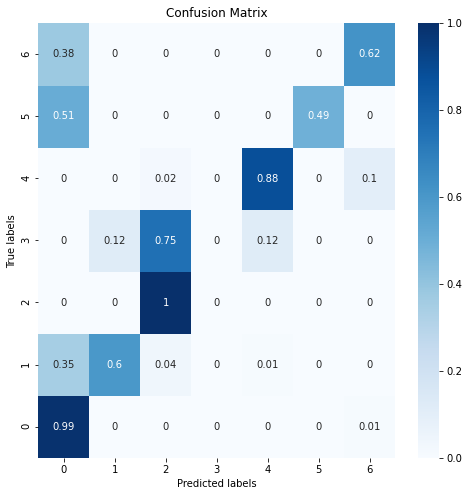

In [133]:
from sklearn.svm import SVC

clf = SVC(C=0.2, kernel='rbf', gamma=1)
clf.fit(X_train_, y_train) 
print(clf.predict(X_test_))
print('accuracy:',clf.score(X_test_,y_test))

y_test_np = np.array(y_test)
recall = (y_test_np[y_test_np == clf.predict(X_test_)]!=0).sum()/ (y_test_np!=0).sum() #The percentage of all non-zero samples (minority categories) that we predict to be correct
print('recall at minority class:', recall) #Focusing on a small categories

t = metrics.classification_report(y_test, clf.predict(X_test_), target_names=['0','1','2','3','4','5','6'])

print(t)
generate_conf_mat(y_test,y_pred)

# CNN

## binary classifier

In [193]:
#binary classifier
df_general = df_labeled[df_labeled['label']==0]

# Undersampling
#Solve the problem of sample imbalance .tweets are randomly selected  
df_0_sample = df_general.sample(n=len(df_without_general))
print(df_0_sample)
#Labels that are not 0 are labeled 1
#label_mapping_binary = {'phishing': 1, 'botnet': 1, 'ddos': 1, 'zeroday': 1, 'malware': 1, 'ransomware': 1, 'general': 0}
label_mapping_binary = {1:1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1}
df_1 = df_labeled[df_labeled['label']!=0].copy(deep=True)
df_1['label'] = df_1['label'].map(label_mapping_binary)
print(df_1)

df_binary = pd.concat([df_0_sample,df_1],ignore_index=True)
#df_binary

X_train, X_test, y_train, y_test = train_test_split(df_binary.text, df_binary['label'].tolist(),test_size=0.3)
print(len(X_train),len(X_test),len(y_train),len(y_test))

                                                   text  \
2768  fresh news iran face seri group immedi claim r...   
6344                        madrid butt bureau watch dc   
4595  fbi email infrastructur compromis use send fak...   
7333  dh talent manag system fundament reimagin depa...   
4151  russian hacker insid austin citi network month...   
...                                                 ...   
4763  enterpris applic best practic blog provid top ...   
4946  hacker compromis fbi extern email system today...   
2752    ceo food price explod fbi nsa warn food amp via   
4304                    hospit high risk patient realiz   
1549  russia continu engag larg scale target thousan...   

                                                  words  label  
2768  [fresh, news, iran, face, seri, group, immedi,...      0  
6344                  [madrid, butt, bureau, watch, dc]      0  
4595  [fbi, email, infrastructur, compromis, use, se...      0  
7333  [dh, talent, manag, syste

In [ ]:
#tokenizer 1 (binary)
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer_1 = Tokenizer()
tokenizer_1.fit_on_texts(X_train)
X_tr = tokenizer_1.texts_to_sequences(X_train)
X_te = tokenizer_1.texts_to_sequences(X_test)

#Padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
maxlen = 15
X_tr = pad_sequences(X_tr, padding='post',maxlen=maxlen).tolist()
X_te = pad_sequences(X_te, padding='post',maxlen=maxlen).tolist()
print(X_train)
print(X_tr)

In [199]:
#binary
import tensorflow.keras.layers as layers
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.metrics as km



vocab_size = len(tokenizer_1.word_index)+1
print('vocab_size',vocab_size)
model_binary = keras.Sequential()
model_binary.add(layers.Embedding(vocab_size, output_dim=50))#,weights=['']

model_binary.add(layers.LSTM(activation = 'tanh', units=128))
# model.add(layers.Conv1D(128,3,activation='relu')) #model.add(layers.Conv1D(128,3,padding='same',activation='relu'))
# model.add(layers.Conv1D(128,5,activation='relu')) #model.add(layers.Conv1D(128,3,padding='same',activation='relu'))
# model.add(layers.GlobalMaxPooling1D())
model_binary.add(layers.Dropout(0.1))

#model.add(layers.Conv1D(32,3,padding='same',activation='relu'))
# model.add(layers.GlobalMaxPooling1D()) #model.add(layers.GlobalAveragePooling1D())
#model.add(layers.Flatten())
model_binary.add(layers.Dense(16, activation='relu'))
model_binary.add(layers.Dense(1, activation='sigmoid'))
#model.add(layers.Activation('softmax'))

#model.add(layers.Dense(1, activation='sigmoid'))
model_binary.summary()
opt = Adam(learning_rate=0.001)
model_binary.compile(optimizer=opt,
             loss='binary_crossentropy',
             metrics=['accuracy',km.Precision(),km.Recall()])


vocab_size 3671
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 50)          183550    
                                                                 
 lstm_1 (LSTM)               (None, 128)               91648     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 16)                2064      
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 277,279
Trainable params: 277,279
Non-trainable params: 0
_________________________________________________________________


In [200]:
# training 1(binary)
# from tensorflow.keras.utils import to_categorical
# train_cate = to_categorical(y_train, 7).tolist()
# test_cate = to_categorical(y_test, 7).tolist()

history = model_binary.fit(X_tr,y_train,
                   epochs=10, batch_size=16,
                   validation_data=(X_te, y_test),
                   verbose=1)
result = model_binary.evaluate(X_te, y_test)
print(result)

Epoch 1/10
165/165 [==============================] - 4s 13ms/step - loss: 0.2800 - accuracy: 0.8799 - precision_3: 0.8744 - recall_3: 0.8877 - val_loss: 0.0843 - val_accuracy: 0.9699 - val_precision_3: 0.9925 - val_recall_3: 0.9466
Epoch 2/10
165/165 [==============================] - 2s 9ms/step - loss: 0.0264 - accuracy: 0.9901 - precision_3: 0.9924 - recall_3: 0.9879 - val_loss: 0.0537 - val_accuracy: 0.9867 - val_precision_3: 0.9893 - val_recall_3: 0.9840
Epoch 3/10
165/165 [==============================] - 1s 9ms/step - loss: 0.0041 - accuracy: 0.9989 - precision_3: 0.9992 - recall_3: 0.9985 - val_loss: 0.0665 - val_accuracy: 0.9796 - val_precision_3: 0.9720 - val_recall_3: 0.9875
Epoch 4/10
165/165 [==============================] - 1s 9ms/step - loss: 0.0060 - accuracy: 0.9989 - precision_3: 0.9985 - recall_3: 0.9992 - val_loss: 0.1006 - val_accuracy: 0.9770 - val_precision_3: 0.9752 - val_recall_3: 0.9786
Epoch 5/10
165/165 [==============================] - 1s 9ms/step - los

In [201]:
#predict result of CNN model 1
pred = model_binary.predict(X_te) [:10]
print(pred) 
label = y_test[:10]
print(label)


[[9.9999928e-01]
 [1.0000000e+00]
 [7.6827229e-07]
 [1.0000000e+00]
 [8.9490095e-07]
 [7.8491183e-07]
 [2.2022354e-05]
 [9.8043829e-01]
 [6.0927778e-02]
 [1.0000000e+00]]
[1, 1, 0, 1, 0, 0, 0, 0, 1, 1]


## multi-class CNN classifier

In [ ]:
# multi-class CNN classifier
df_without_general = df_labeled[df_labeled['label']!=0]
X_train, X_test, y_train, y_test = train_test_split(df_without_general.text, df_without_general['label'].tolist(),test_size=0.3)


In [162]:
#tokenizer (multi)
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()

#To generate a dictionary
tokenizer.fit_on_texts(X_train)

#Sentences are converted to word index sequences
X_tr = tokenizer.texts_to_sequences(X_train)
X_te = tokenizer.texts_to_sequences(X_test)

#Padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
maxlen = 15
X_tr = pad_sequences(X_tr, padding='post',maxlen=maxlen).tolist()
X_te = pad_sequences(X_te, padding='post',maxlen=maxlen).tolist()
print(X_train)
print(X_tr)

37      feder agenc issu joint statement manag libor t...
3386    malwar discov javascript librari access millio...
3578    ransomwar protect guid compani vote detect dat...
3329    downtim costli detriment aspect ransomwar lear...
6024    someon hack fbi sent fake email offici fbi ema...
                              ...                        
118     stay safe vpn like alway key stay safe hide on...
519     smallbiz must practic dataloss prevent protect...
366     massiv campaign use youtub push password steal...
4643    social engin emot game crucial understand crim...
223     hard code key vulner logix plc sever score cod...
Name: text, Length: 1316, dtype: object
[[145, 904, 905, 60, 906, 907, 32, 28, 33, 2, 8, 3, 22, 30, 34], [41, 71, 4, 18, 8, 10, 5, 15, 16, 3, 20, 31, 12, 1, 343], [1, 39, 383, 54, 384, 153, 23, 138, 0, 0, 0, 0, 0, 0, 0], [622, 908, 909, 1, 107, 551, 76, 745, 1, 39, 110, 23, 39, 10, 5], [27, 7, 9, 24, 21, 6, 26, 9, 6, 25, 17, 1, 0, 0, 0], [1401, 1402, 308, 1133

In [169]:
#CNN structure

import tensorflow.keras.layers as layers
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.metrics as km



vocab_size = len(tokenizer.word_index)+1
model = keras.Sequential()
model.add(layers.Embedding(vocab_size, output_dim=50))#,weights=['']

#model.add(layers.LSTM(activation = 'tanh', units=128))
model.add(layers.Conv1D(128,3,activation='relu')) #model.add(layers.Conv1D(128,3,padding='same',activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dropout(0.1))

#model.add(layers.Conv1D(32,3,padding='same',activation='relu'))
# model.add(layers.GlobalMaxPooling1D()) #model.add(layers.GlobalAveragePooling1D())
#model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(7, activation='sigmoid'))
#model.add(layers.Activation('softmax'))

#model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt,
             loss='CategoricalCrossentropy',
             metrics=['accuracy',km.Precision(),km.Recall()])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 50)          96900     
                                                                 
 conv1d (Conv1D)             (None, None, 128)         19328     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 16)                2064      
                                                                 
 dense_1 (Dense)             (None, 7)                 119       
                                                      

In [171]:
from tensorflow.keras.utils import to_categorical
train_cate = to_categorical(y_train, 7).tolist()
test_cate = to_categorical(y_test, 7).tolist()

history = model.fit(X_tr,train_cate,
                   epochs=20, batch_size=8,
                   validation_data=(X_te, test_cate),
                   verbose=1)
result = model.evaluate(X_te, test_cate)
print(result)

Epoch 1/20
165/165 [==============================] - 1s 3ms/step - loss: 0.0503 - accuracy: 0.9932 - precision: 0.5555 - recall: 1.0000 - val_loss: 0.0657 - val_accuracy: 0.9911 - val_precision: 0.5348 - val_recall: 0.9947
Epoch 2/20
165/165 [==============================] - 0s 3ms/step - loss: 0.0441 - accuracy: 0.9932 - precision: 0.5714 - recall: 1.0000 - val_loss: 0.0622 - val_accuracy: 0.9911 - val_precision: 0.5374 - val_recall: 0.9947
Epoch 3/20
165/165 [==============================] - 0s 3ms/step - loss: 0.0398 - accuracy: 0.9947 - precision: 0.5831 - recall: 1.0000 - val_loss: 0.0595 - val_accuracy: 0.9911 - val_precision: 0.5760 - val_recall: 0.9947
Epoch 4/20
165/165 [==============================] - 0s 3ms/step - loss: 0.0376 - accuracy: 0.9962 - precision: 0.5920 - recall: 1.0000 - val_loss: 0.0572 - val_accuracy: 0.9911 - val_precision: 0.5807 - val_recall: 0.9947
Epoch 5/20
165/165 [==============================] - 0s 3ms/step - loss: 0.0336 - accuracy: 0.9954 - pr

### CNN with own Word2vec Embedding.

In [172]:
from gensim.models.word2vec import Word2Vec

#min_count = 3 : The lowest frequency of words to be considered
#workers: Parallelization training - number of CPU cores
#window: Word context window size
Word2VecModel = Word2Vec(data_words_1,workers=4,window=10) #Format: [['lets','B'],['C','D','E']]
vocab_list = [word for word in Word2VecModel.wv.index_to_key] 
print(vocab_list)

['email', 'fake', 'fbi', 'hacker', 'system', 'ransomwar', 'send', 'compromis', 'hack', 'data', 'malwar', 'today', 'cybercrim', 'technolog', 'protect', 'infosec', 'infrastructur', 'target', 'warn', 'use', 'extern', 'busi', 'amp', 'bloomberg', 'spamhau', 'tech', 'databreach', 'us', 'new', 'cyberthreat', 'zeroday', 'ciso', 'threat', 'learn', 'via', 'risk', 'russia', 'organ', 'address', 'gt', 'phish', 'admin', 'daysofcod', 'help', 'servic', 'sent', 'vulner', 'breach', 'dataprivaci', 'compani', 'zerotrust', 'report', 'pax', 'microsoft', 'iot', 'datatheft', 'year', 'provid', 'raid', 'ddo', 'ai', 'increas', 'work', 'offici', 'read', 'firm', 'apt', 'network', 'devic', 'botnet', 'code', 'solarwind', 'russian', 'suppli', 'prepar', 'chain', 'one', 'digit', 'rt', 'applic', 'govern', 'prevent', 'oper', 'advanc', 'leverag', 'china', 'group', 'discuss', 'view', 'explor', 'state', 'secur', 'healthcar', 'cloud', 'critic', 'server', 'stpiindia', 'vapt', 'industri', 'stpi', 'feder', 'expert', 'datasci', 

In [175]:
#
word_index = {" ": 0}# Initializes' [word: token] ', which is used by the later Tokenize corpus.  
word_vector = {} # Initialize the [word: vector] dictionary

vocab = tokenizer.word_index
# Initialize the large matrix that stores all the vectors, noting the extra bit (first line). The word vectors are all zeros for padding.  
# The number of lines is all words +1, such as 5000+1;  The number of columns is the word vector "dimension" such as 200.
embeddings_matrix = np.zeros((len(vocab) + 1, Word2VecModel.vector_size))


## Fill the dictionary and matrix above
for word,i in vocab.items():
    word = vocab_list[i]  # Each word
    word_index[word] = i + 1  # Words:  number
    word_vector[word] = Word2VecModel.wv[word] # Words: word vectors
    embeddings_matrix[i] = Word2VecModel.wv[word]  # word vectors matrix
embeddings_matrix.shape


(1938, 100)

In [164]:
tokenizer.word_index

{'ransomwar': 1,
 'malwar': 2,
 'hacker': 3,
 'infosec': 4,
 'cybercrim': 5,
 'email': 6,
 'hack': 7,
 'zeroday': 8,
 'fbi': 9,
 'databreach': 10,
 'phish': 11,
 'ciso': 12,
 'technolog': 13,
 'tech': 14,
 'datatheft': 15,
 'dataprivaci': 16,
 'warn': 17,
 'zerotrust': 18,
 'ddo': 19,
 'botnet': 20,
 'fake': 21,
 'breach': 22,
 'data': 23,
 'sent': 24,
 'address': 25,
 'offici': 26,
 'someon': 27,
 'apt': 28,
 'gt': 29,
 'pleas': 30,
 'rt': 31,
 'cyberwar': 32,
 'securitybreach': 33,
 'retweet': 34,
 'busi': 35,
 'cyberthreat': 36,
 'target': 37,
 'via': 38,
 'protect': 39,
 'vulner': 40,
 'daysofcod': 41,
 'threat': 42,
 'privaci': 43,
 'new': 44,
 'cybersec': 45,
 'year': 46,
 'us': 47,
 'infosecur': 48,
 'report': 49,
 'use': 50,
 'expert': 51,
 'organ': 52,
 'datasecur': 53,
 'compani': 54,
 'cio': 55,
 'system': 56,
 'dataprotect': 57,
 'one': 58,
 'million': 59,
 'manag': 60,
 'cybercrimin': 61,
 'leadership': 62,
 'healthcar': 63,
 'hit': 64,
 'ceo': 65,
 'amp': 66,
 'cybersecur

In [176]:
import tensorflow.keras.layers as layers
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.metrics as km



vocab_size = len(tokenizer.word_index)+1
model1 = keras.Sequential()
model1.add(layers.Embedding(vocab_size,input_length=maxlen,weights=[embeddings_matrix], output_dim=100))#,weights=['']

#model.add(layers.LSTM(activation = 'tanh',units=64))
model1.add(layers.Conv1D(128,3,activation='relu')) #model.add(layers.Conv1D(128,3,padding='same',activation='relu'))
model1.add(layers.GlobalMaxPooling1D())
model1.add(layers.Dropout(0.1))

#model.add(layers.Conv1D(32,3,padding='same',activation='relu'))
# model.add(layers.GlobalMaxPooling1D()) #model.add(layers.GlobalAveragePooling1D())
#model.add(layers.Flatten())
model1.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dense(7, activation='sigmoid'))
#model.add(layers.Activation('softmax'))

#model.add(layers.Dense(1, activation='sigmoid'))
model1.summary()
#model1.set_weights(embeddings_matrix)
opt = Adam(learning_rate=0.0001)
model1.compile(optimizer=opt,
             loss='CategoricalCrossentropy',
             metrics=['accuracy',km.Precision(),km.Recall()])


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 15, 100)           193800    
                                                                 
 conv1d_1 (Conv1D)           (None, 13, 128)           38528     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 16)                2064      
                                                                 
 dense_3 (Dense)             (None, 7)                 119       
                                                      

In [180]:
from tensorflow.keras.utils import to_categorical
train_cate = to_categorical(y_train, 7).tolist()
test_cate = to_categorical(y_test, 7).tolist()

history = model1.fit(X_tr,train_cate,
                   epochs=20, batch_size=8,
                   validation_data=(X_te, test_cate),
                   verbose=1)
result = model1.evaluate(X_te, test_cate)
print(result)

Epoch 1/20
165/165 [==============================] - 1s 3ms/step - loss: 0.0141 - accuracy: 0.9970 - precision_1: 0.3505 - recall_1: 1.0000 - val_loss: 0.0630 - val_accuracy: 0.9823 - val_precision_1: 0.3431 - val_recall_1: 0.9982
Epoch 2/20
165/165 [==============================] - 1s 3ms/step - loss: 0.0125 - accuracy: 0.9954 - precision_1: 0.3487 - recall_1: 1.0000 - val_loss: 0.0690 - val_accuracy: 0.9823 - val_precision_1: 0.3441 - val_recall_1: 0.9982
Epoch 3/20
165/165 [==============================] - 1s 3ms/step - loss: 0.0184 - accuracy: 0.9939 - precision_1: 0.3488 - recall_1: 1.0000 - val_loss: 0.0598 - val_accuracy: 0.9823 - val_precision_1: 0.3425 - val_recall_1: 0.9982
Epoch 4/20
165/165 [==============================] - 1s 3ms/step - loss: 0.0112 - accuracy: 0.9985 - precision_1: 0.3507 - recall_1: 1.0000 - val_loss: 0.0707 - val_accuracy: 0.9823 - val_precision_1: 0.3484 - val_recall_1: 0.9982
Epoch 5/20
165/165 [==============================] - 1s 3ms/step - loss

In [181]:
#predict result of CNN model
pred = model.predict(X_te) 
pred = np.argmax(pred, axis = 1)[:10] 
label = np.argmax(test_cate,axis = 1)[:10] 
print(pred) 
print(label)

# to human language:
label_re = {k:v for v,k in label_mapping.items()}
print([label_re[i] for i in pred]) 
print([label_re[i] for i in label])

_, a1, _, a2= model.evaluate(X_te, test_cate)

print("accuracy on val, accuracy on train: ", a1 , a2 )

[6 2 6 6 4 1 1 6 5 2]
[6 2 6 6 4 1 1 6 5 2]
['ransomware', 'botnet', 'ransomware', 'ransomware', 'zeroday', 'phishing', 'phishing', 'ransomware', 'malware', 'botnet']
['ransomware', 'botnet', 'ransomware', 'ransomware', 'zeroday', 'phishing', 'phishing', 'ransomware', 'malware', 'botnet']
18/18 [==============================] - 0s 2ms/step - loss: 0.0653 - accuracy: 0.9823 - precision_1: 0.3528 - recall_1: 0.9982
accuracy on val, accuracy on train:  0.9822695255279541 0.9982269406318665


In [42]:
# my test instance 
#phishing': 1, 'botnet': 2, 'ddos': 3, 'zeroday': 4, 'malware': 5, 'ransomware': 6, 'general': 0
my_test_tweets = ['we are tracking a very nasty botnet on mxroute insistently',
                  'I am suffering from malware and malware viruses infect computers all the time',
                  'almost organizations brazil targeted banking trojan fintech payment infosec zerotrust zeroday databreach cybercrime datatheft dataprivacy hacker malware botnet' ]
s=[]
for i in list(text_clean(my_test_tweets)):
    s.append(" ".join(i))

my_test = tokenizer.texts_to_sequences(s)
my_test  = pad_sequences(my_test, padding='post',maxlen=maxlen).tolist()
print( model.predict(my_test))
[np.argmax(i) for i in model.predict(my_test)]

[[0.08872119 0.6048145  0.23358876 0.2765867  0.46758056 0.6007509
  0.7240927 ]
 [0.03001621 0.60359734 0.5144459  0.30737033 0.55209243 0.9942033
  0.04092762]
 [0.02730703 0.72543037 0.95593977 0.85868406 0.8090918  0.41518983
  0.02586684]]


[6, 5, 2]

In [185]:
#Generalization test:
df_mytest

,name,id,createtime,text
0,Lala35539674,1468706493008695299,Wed Dec 08 22:18:09 +0000 2021,The Evolving Technology of #cybercrime!\n\nhtt...
1,cybersec_feeds,1468706475547709448,Wed Dec 08 22:18:05 +0000 2021,The Evolving Technology of #cybercrime!\n\nhtt...
2,ACGlobalEnergy,1468706202976755714,Wed Dec 08 22:17:00 +0000 2021,How can energy infrastructure reduce its expos...
3,DrAlmdaoi,1468706144181010433,Wed Dec 08 22:16:46 +0000 2021,Cybersecurity can pose a risk in more than one...
4,JeanDoobs,1468705726449266691,Wed Dec 08 22:15:07 +0000 2021,#CyberAttacks on Financial Institutions [ #Inf...
...,...,...,...,...
95,sectest9,1468674680026402820,Wed Dec 08 20:11:45 +0000 2021,It’s time for #MSPs to help save the world fro...
96,CyberSecurityN8,1468674573759496196,Wed Dec 08 20:11:19 +0000 2021,It’s time for #MSPs to help save the world fro...
97,farisAl90049972,1468673990776479752,Wed Dec 08 20:09:00 +0000 2021,#Ad Cyberattacks around the world are increasi...
98,Psywin,1468673933943607296,Wed Dec 08 20:08:47 +0000 2021,A Taiwan-based cyberattack group has been laun...


In [291]:
df_mytest = pd.read_csv('df_test.csv')

#Boolean slice: cascade of the two classifiers
pred_binary = model_binary.predict(X_myte) 
pred_boolean = (pred_binary>=0.5).squeeze()
pred_binary = (pred_binary >= 0.5).astype('int32').squeeze()
print(pred_binary)
# tt = np.array(X_myte)
# X_myte_relavant = tt[pred_boolean]
df_mytest = df_mytest[pred_boolean]



sentences = []
for i in list(text_clean((df_mytest.text))):
    sentences.append(" ".join(i))
#print(sentences)

X_mytest = tokenizer.texts_to_sequences(sentences)

#Padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
maxlen = 15
X_myte = pad_sequences(X_mytest, padding='post',maxlen=maxlen).tolist()

#-------
pred = model1.predict(X_myte) 
pred = np.argmax(pred, axis = 1)

label_re = {k:v for v,k in label_mapping.items()}

pred = [label_re[i] for i in pred]
df_mytest['label'] = pred
#print(X_mytest)
#print(pred)
#print(df_mytest)
example = df_mytest.iloc[28]
print(example['name'], 'tweeted at: ',example['createtime'],'\n'
      'The content is: ', example['text'],'\n'
      'The tweet is relate to particular attacks, the category is: ', example['label'])

IT_SupplyChain tweeted at:  Wed Dec 08 20:29:26 +0000 2021 
The content is:  Organisations Facing Greater Risk of Ransomware Cyberattacks as More Workers Shop on Company-Owned Devices https://t.co/m0yG2SS42F 
The tweet is relate to particular attacks, the category is:  ransomware


In [457]:
#---Debug---#

# weight_Dense_1,bias_Dense_1 = model.get_layer('dense_84').get_weights()
# print(weight_Dense_1[0:3],bias_Dense_1[0:3])

# print(len(weight_Dense_1[1][weight_Dense_1[1]>0]))
# print(len(bias_Dense_1[bias_Dense_1>0]))

# from tensorflow.keras.models import Model
# dense1_layer_model = Model(inputs=model.input,outputs=model.get_layer('dense_84').output)
# dense1_output = dense1_layer_model.predict(X_te[0:3])
# dense2_layer_model = Model(inputs=model.input,outputs=model.get_layer('dense_85').output)
# dense2_output = dense2_layer_model.predict(X_te[0:3])
# print (dense1_output)
# print (dense1_output.shape)
# print (dense2_output)

[[ 0.1119644  -0.2698532   0.1940562   0.16877852  0.23431365  0.26971596
   0.30724487 -0.16231135 -0.10550594  0.20874308 -0.14712277 -0.15247276
  -0.12228247  0.07404162 -0.19773258  0.2268587 ]
 [-0.08132872  0.1308463   0.04586946  0.18607527  0.04152371 -0.12002142
   0.06931958  0.22945784 -0.14847651 -0.27350864 -0.02729598  0.08733794
   0.02076745  0.30784678  0.23523712  0.055845  ]
 [-0.18473192  0.24668765 -0.0371303   0.27152067 -0.09162179  0.14434063
   0.16662186 -0.06270798 -0.02779092 -0.04386346 -0.03207543 -0.11496083
  -0.23126729  0.27659452 -0.11688398  0.03448319]] [0.         0.01488944 0.03885043]
11
12
[[0.         0.12412162 2.4009092  5.7052493  0.         2.7358172
  3.3429124  1.84279    0.         6.6507382  2.305413   0.
  1.1951652  0.         1.3133352  7.688042  ]
 [0.         0.         4.9372354  0.         4.844952   7.394881
  5.560061   0.15300636 0.         7.995228   0.10355051 0.
  5.515774   0.         0.12384307 0.        ]
 [0.         1

# Semi-supervised learning technique: Pseudo-labelling 

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
#model: model used for iterative training, taking SVM as an example.
#finished_num： The number of items that have been manually annotated
#sample_rate： Percentage of unlabeled samples that are used as pseudo_labeled samples
#return a pandas df. 
def pseudo_label(model, finished_num, all_data, sample_rate ):
    all_data = all_data.copy(deep=True)
    labeled_data = all_data[:finished_num]
    
    unlabeled_data = all_data[finished_num: ]
    
    num_of_samples = int(len(unlabeled_data) * sample_rate)
   
    
    for i in range(int(1/sample_rate)):
        unlabeled_data['label'] = np.nan
        
        #random sample.
        sampled_pseudo_data = unlabeled_data.sample(n=num_of_samples)
        #print(sampled_pseudo_data)
        
        tv = TfidfVectorizer()
        tv_fit = tv.fit(labeled_data.text)
        X_train_ = tv_fit.transform(labeled_data.text)
        X_test_ = tv_fit.transform(sampled_pseudo_data.text)
        
        #Retrain the model using pseudo and labeled data sets
        model.fit(X_train_,labeled_data.label)
        
        #Use trained models to predict labels for unlabeled data
        pseudo_labels = model.predict(X_test_)
        sampled_pseudo_data['label'] = pseudo_labels
        
        # Combine some data in the test set with false labels into the training set
        # The training set increases while the test set decreases  
        labeled_data = pd.concat([labeled_data,sampled_pseudo_data])
        unlabeled_data = unlabeled_data[~unlabeled_data.index.isin(sampled_pseudo_data.index.tolist())]
        print(labeled_data)
        #print(unlabeled_data)
    return labeled_data


In [66]:
from sklearn.svm import SVC
svm = SVC(C=0.5, kernel='rbf', gamma=1)

pseudo_result = pseudo_label(svm , 4167, df_labeled, 0.2 )
pseudo_result.to_csv('pseudo.csv')
print(pseudo_result)

<ipython-input-58-04e1073e0f03>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unlabeled_data['label'] = np.nan


                                                   text  \
0     let demystifi common type firmwar use wild tod...   
1     let demystifi common type firmwar use wild tod...   
2     rise here quick look common type cybercrim cyb...   
3     rise here quick look common type cybercrim cyb...   
4     cybercrim rate nearli result covid pandem stay...   
...                                                 ...   
4725                break fbi hack spam email fake sent   
6220  hacker compromis fbi extern email system today...   
7489  wonder protect work home step includ differ pa...   
7171                    hospit high risk patient realiz   
6669  liter joint paper written thale huawei energi ...   

                                                  words  label  
0     [let, demystifi, common, type, firmwar, use, w...      5  
1     [let, demystifi, common, type, firmwar, use, w...      5  
2     [rise, here, quick, look, common, type, cyberc...      1  
3     [rise, here, quick, look,

[6 6 0 ... 0 0 1]
0.9744


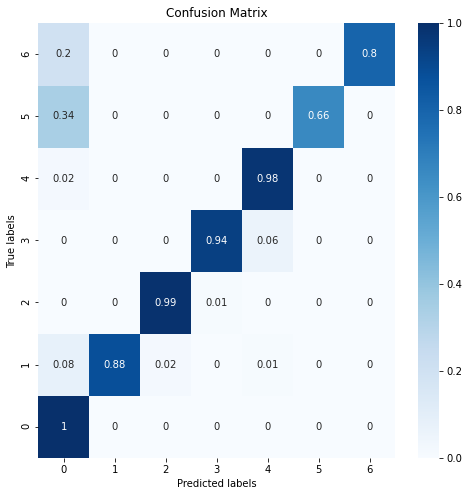

In [103]:
#Evaluate the effectiveness of pseudo labels
X_train, X_test, y_train, y_test = train_test_split(pseudo_result.text, pseudo_result['label'].tolist(),test_size=0.3)

tv = TfidfVectorizer()
tv_fit = tv.fit(X_train)
X_train_ = tv_fit.transform(X_train)
X_test_ = tv_fit.transform(X_test)


clf = SVC(C=0.5, kernel='rbf', gamma=1)
clf.fit(X_train_, y_train) 
print(clf.predict(X_test_))
print(clf.score(X_test_,y_test))

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test_)

conf_mat = confusion_matrix(y_test, y_pred) #row: y_true,0,1,2...  column:y_pred,0,1,2...
#print(conf_mat)
conf_mat_norm = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]    
conf_mat_norm = np.around(conf_mat_norm, decimals=2)

# === plot ===
plt.figure(figsize=(8, 8))
sns.heatmap(conf_mat_norm, annot=True, cmap='Blues') # annot=True to annotate cells

#The scope of plotting the Y-axis
plt.ylim(0, 7)
plt.title('Confusion Matrix'); 
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()